In [1]:
from google.colab import drive
drive.mount ('/content/drive/')

Mounted at /content/drive/


타이타닉 호의 침몰은 역사상 악명 높은 난파 사고였습니다. 1912년 4월 15일 항해 중간 쯤 타이타닉호는 빙하에 부딪혀 가라앉았고, 이로 인해 2224명 중 1502명의 승객과 선원이 사망했습니다. 이러한 이유로 이름이 DieTanic입니다. 이는 세계적으로 아무도 잊을 수 없는 재앙입니다.  
  
75억이 들었습니다. 타이타닉호를 짓는데. 그리고 충돌로 인해서 바다 밑으로 가라앉았습니다. 타이타닉 데이터셋은 초보자에게 매우 좋습니다. 데이터 사이언스 여정을 시작하고 캐글 경진대회에 참여하려고 하는 초보자 들에게.  
  
이 노트북의 목적은 아이디어를 주는 것 입니다. 예측 모델링 문제의 흐름이 어떻게 되는지에 대한. 어떻게 피처를 점검하고, 새로운 피처를 추가하는지 그리고 일부의 기계 학습 개념을. 저는 노트북을 기초적으로 유지하려고 노력해 왔습니다. 초보자들도 매 흐름을 이해할 수 있도록 

# Contents of the Notebook:  
  
## Part1: Exploratory Data Analysis(EDA):
1) Analysis of the features.  
  
2) Finding any relations or trends considering multiple features.
  
## Part2: Feature Engineering and Data Cleaning:
1) Adding any few features.  
  
2) Removing redundant features.  
  
3) Converting features into suitable from for modeling.  
  
## Part3: Predictive Modeling  
1) Running basic Algorithms.  
  
2) Cross Validation.  
  
3) Ensembling.  
  
4) Important Features Extraction.

## Part1: Exploratory Data Analysis(EDA)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore') # 버전이 올라갈 때 변경된 사항을 알려 주는 경고 메세지를 숨긴다.
%matplotlib inline

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle study/Titanic/train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().sum() # 총 null values를 검사

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin 그리고 Embarked 는 null values가 있습니다. 이들을 바로 잡겠습니다.

얼마나 살아 남았는지 체크

In [7]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

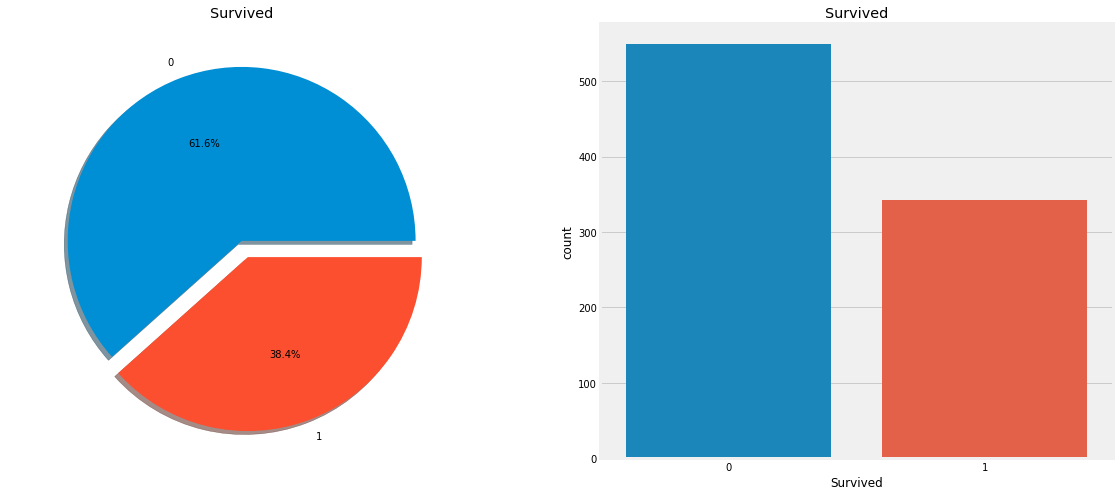

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel(' ')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

해당 사고에서 많지 않은 승객이 살아 남았다는 것은 명백합니다.  
트레이닝 셋에서 891 명의 승객 중 오직 250명 정도 많이 살아남았습니다. 이는 전체 트레이닝 셋의 충돌 사고에서 38.4%에 해당합니다. 우리는 데이터에서 더 나은 인사이트를 얻기 위해 더 파보아야 합니다. 그리고 봐야 합니다. 승객들이 살아 남았거나 그렇지 못한 카테고리를.  
  
우리는 생존률을 확인할 것입니다. 데이터셋의 다른 피처들을 활용해서. 이 피처들은 성별, 탑승 항구, 나이 등이 있습니다.  
  
먼저 피처들의 타입들에 대해서 이해해 보겠습니다.

### Types Of Features
**Categorical Feature:**  
범주형 변수는 두개나 이 이상의 범주를 갖습니다. 또한 여기에 속한 각각의 값은 분류될 수 있습니다. 예를 들어 성별은 두 카테고리를 갖는 범주형 변수입니다. (남자, 여자) 우리는 이러한 변수에 대해 순서를 부여할 수 없습니다. 이들은 또한 명목 변수로 알려져 있기도 합니다.  
  
**Categorical Features in the dataset: Sex, Embarked**

**Ordinal Features:**  
순서형 변수들은 범주형 변수와 비슷하지만 다른 점은 상대적인 순서를 부여하거나 값들을 정렬할 수 있다는 것입니다. 예를 들어 키와 같은 피처에 대해 큰, 중간, 작은 등이 있으며 키는 순서형 변수입니다. 우리는 상대적인 값들을 정렬할 수 있습니다.  
**Ordinal Features in the dataset: PClass**

**Continous Feature:**  
피처가 연속적이라고 한다면 값을 취할 수 있습니다. 어느 두 지점 혹은 최소, 최대 값을 피처 열에 대해서.  
**Continous Features in the dataset: Age**

### Analysing The Features
### Sex -> Categorical Feature

In [9]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [10]:
# Sex를 인덱스로 해서 Survived로 dataframe을 집게한다.
data.groupby(['Sex', 'Survived']).count()

PassengerId  Pclass  Name  Age  ...  Ticket  Fare  Cabin  Embarked
Sex    Survived                                  ...                               
female 0                  81      81    81   64  ...      81    81      6        81
       1                 233     233   233  197  ...     233   233     91       231
male   0                 468     468   468  360  ...     468   468     62       468
       1                 109     109   109   93  ...     109   109     45       109

[4 rows x 10 columns]

In [11]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [12]:
data[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


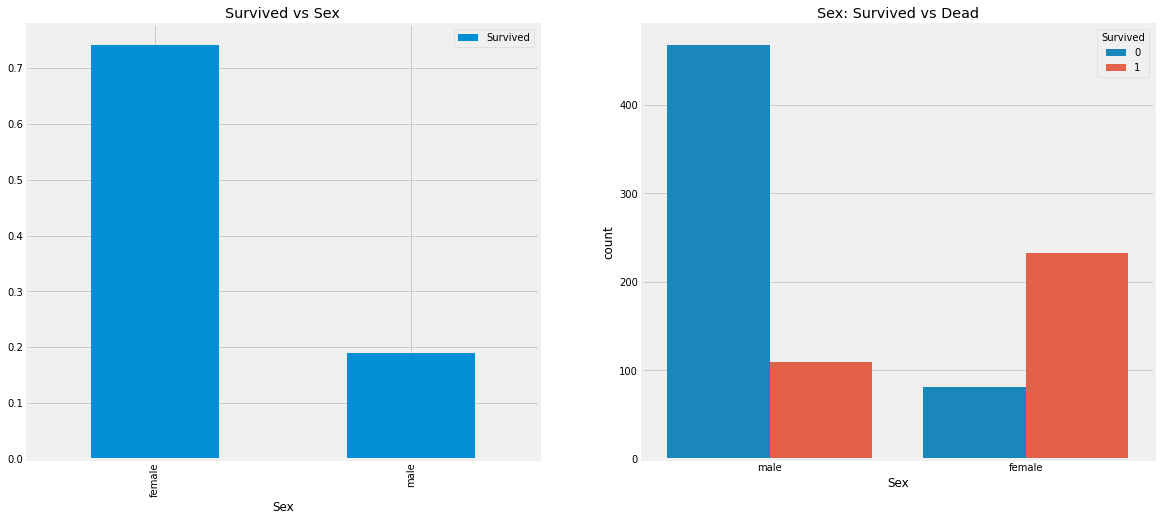

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

흥미로워 보입니다. 배에서 남자들의 숫자는 여자의 수 보다 많습니다. 하지만 살아 남은 여자의 수는 남자 수에 비해서 거의 두 배입니다. **배의 여자 생존률은 75%에 달하는 반면 남자는 18-19%입니다.**  
이는 모델링에 있어서 매우 중요한 피처인듯 합니다. 하지만 이것이 최선일까요? 다른 피처를 확인해 보겠습니다.

### Pclass -> Ordinal Feature

In [14]:
pd.crosstab(data.Pclass, data.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [15]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


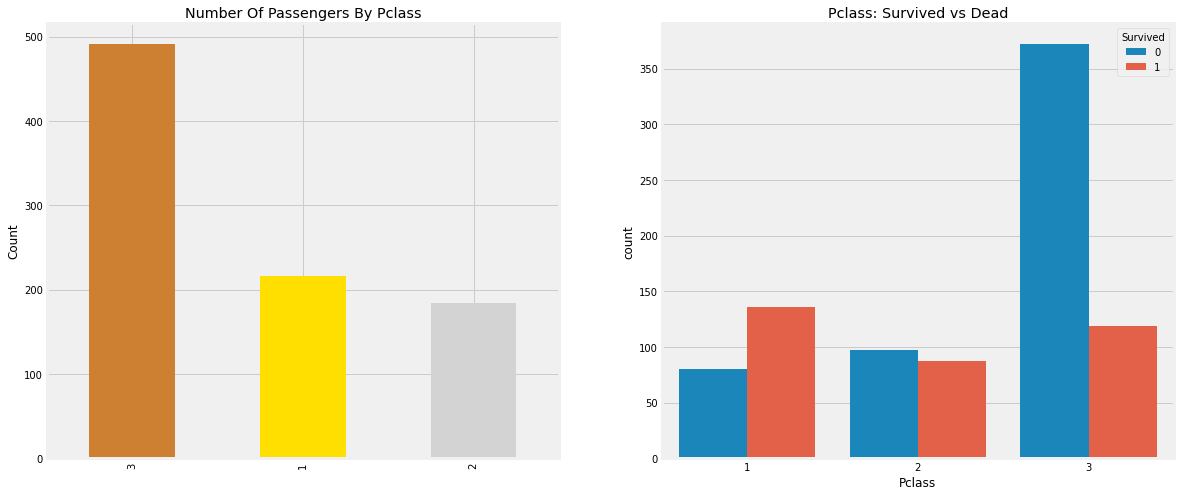

In [16]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

사람들은 "돈으로 모든 것을 살 수 없다"고 말합니다. 하지만 우리는 분명하게 볼 수 있습니다. Pclass1의 승객은 구조에 있어 매우 높은 우선 순위를 얻었습니다. 심지어 Pclass 3의 승객의 수가 비교적으로 매우 많았지만 살아 남은 수는 매우 적었습니다. **25%** 근처 정도 될 것입니다.  
Pclass 1의 경우 산 사람은 **63%** 정도 되는 반면 Pclass 2는 **48%** 정도입니다. 따라서 돈과 지위는 중요합니다.  
조금 더 파고 들어가 확인해 봅시다. 다른 흥미로운 관측에 대해. **Sex, Pclass**에 대한 생존률을 같이 확인해 봅시다.

In [17]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

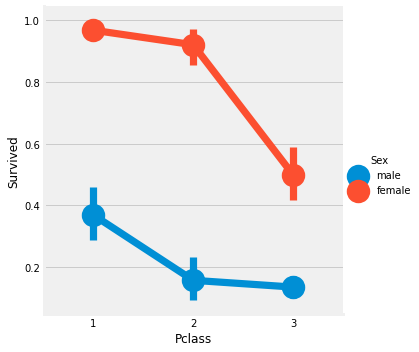

In [18]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

이 경우에 대해서는 **FactorPlot**을 썼습니다. 이들은 categorical values에 대한 구분을 쉽게 만들어 줍니다.  
CrossTab과 FactorPlot을 보면, 우리는 쉽게 추론할 수 있습니다. Pclass1의 여자 생존률은 **95-96%** 정도이며 Pclass1의 여성들은 오직 94명 중 3명이 죽었습니다.  
이는 명확합니다. Pclass엥 상관 없이 여성은 구조에 있어 첫 번째 우선순위를 얻습니다. 심지어 Pclass1의 남성은 매우 낮은 생존률을 기록했습니다.  
Pclass 또한 매우 중요한 피처로 보입니다. 다른 피처들 또한 분석해 봅시다.

### Age -> Continous Feature

In [19]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


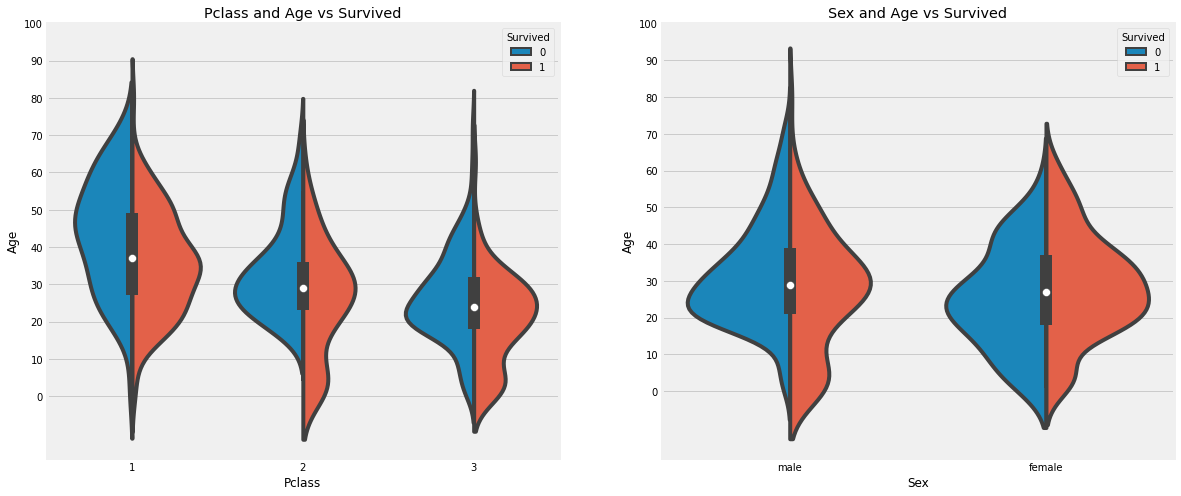

In [20]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot("Sex", "Age", hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

**논평:**  
1) 아이들의 수는 Pclass에 따라 증가합니다. 그리고 10살 미만 승객의 생존률(즉, 아이들)은 Pclass에 상관 없이 좋은 것 같습니다.  
2) Pclass1 승객의 20-50살의 생존 기회는 높으며 심지어 여성들보다 좋습니다.  
3) 남성에 있어, 생존 기회는 나이가 증가할 수록 감소합니다.

이전에 봤는이 Age feature은 177개의 null 값을 가집니다. 이 NaN 값을 대체하기 위해 우리는 데이터 셋에서 나이의 평균 값을 할당할 것입니다.  
하지만 문제는 다양한 나이대를 가진 많은 사람들이 있다는 것입니다. 우리는 4살의 아이에게 평균 값인 29살을 할당할 수 없습니다. 승객의 연령 밴드가 어떻게 되는지에 대해서 알 방법이 없을까요?  
**Name** Feature를 확인할 수 있습니다. 이로써 Mr or Mrs와 같은 이름이 가진 인사말을 확인할 수 있습니다. 그러므로 우리는 Mr와 Mrs의 상대적 그룹에 대한 평균 값을 할당할 수 있습니다.

In [21]:
data['Initial'] = 0
for i in data:
  data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') # extract the Salutation 영어 대문자, 소문자 + dot 추출

Salutation에는 영어 뿐만 아니라 . (dot)까지 포함돼 있다. 따라서 정규식을 이용해 해당 문자가 들어 있는 모든 부분을 추출한다.

In [22]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r') # 성별에 따른 Initial 확인

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Mille, Mme과 같이 잘못 적힌 이니셜이 있습니다. 이는 Miss에 대응돼야 합니다. 이러한 경우를 Miss처럼 올바르게 대응시켜 주겠습니다.

In [23]:
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'], ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace=True)

In [24]:
data.groupby('Initial')['Age'].mean() # Initial에 따른 평균 나이대 확인

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

**Filling NaN Ages**

In [25]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial=='Other'), 'Age'] = 46

In [26]:
data.Age.isnull().any()

False

Age Feature에 대한 null data가 모두 제거되었습니다.

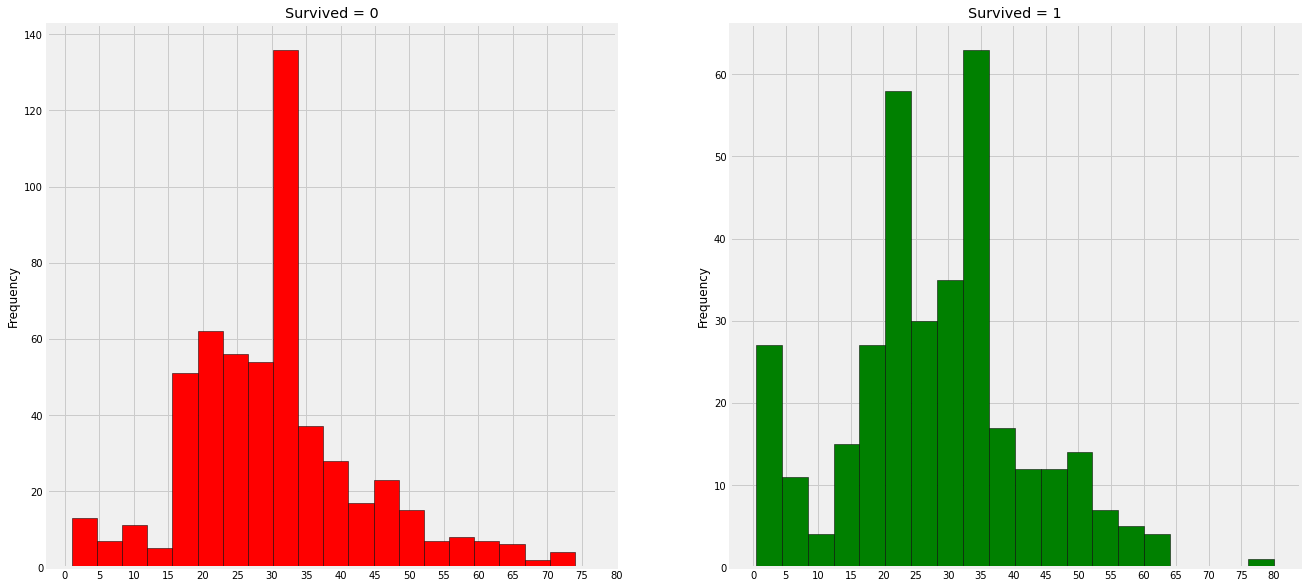

In [27]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived = 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)

plt.show()

**논평:**  
1) Toddlers (나이 5세 미만)은 매우 많은 수가 생존했습니다. (여성, 아이 우대 정책에 의해).  
2) 나이가 가장 많은 승객은 생존했습니다. (80살)  
3) 가장 많은 수가 사망한 나이대는 30-40입니다.

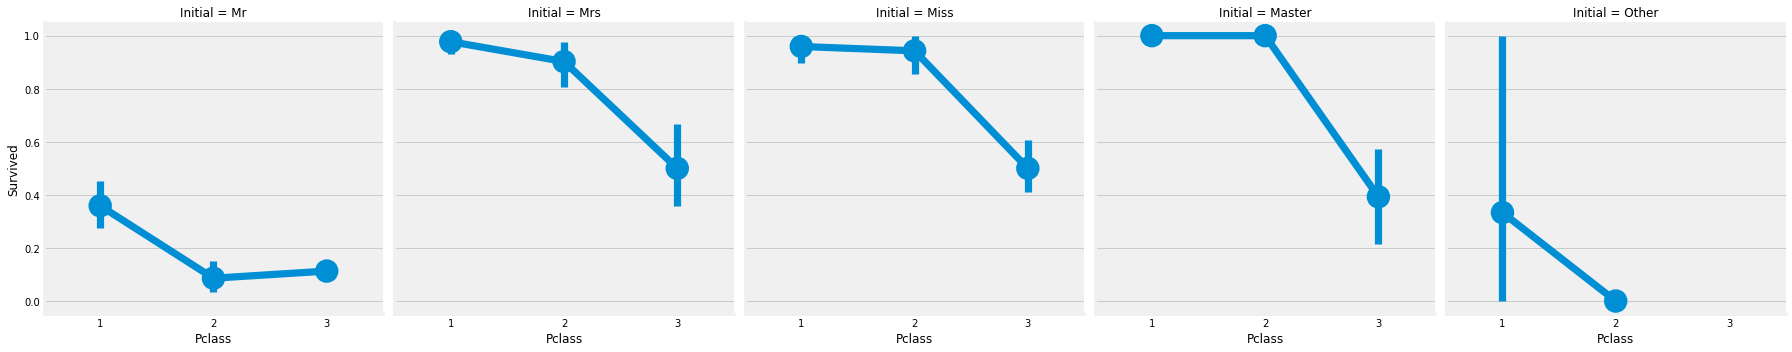

In [28]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

class에 상관 없이 여성, 아이 우대 정책은 유효합니다.

### Embarked -> Categorical Value

In [29]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

**Chances for Survival by Port Of Embarkation**

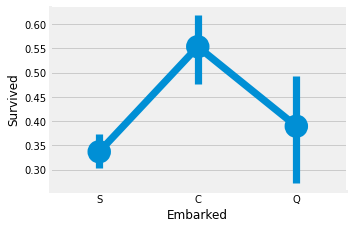

In [30]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

Port C의 생존 기회는 0.55 정도로 가장 높은 반면 S는 가장 낮았습니다.

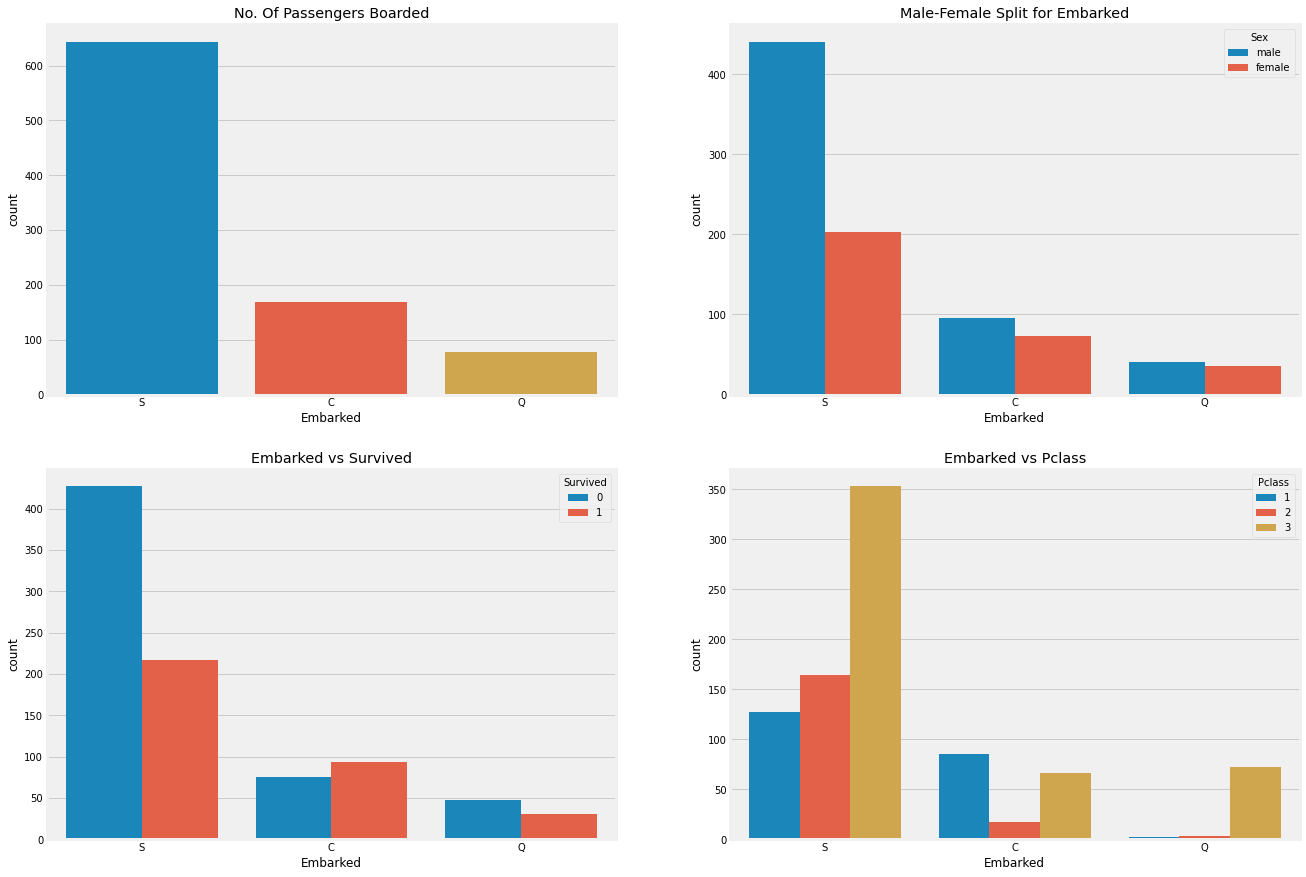

In [31]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue = 'Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue = 'Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')

# plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**논평:**  
1) S 항구에서 가장 많은 승객이 탑승했습니다. 이 중 대다수는 Pclass3 입니다.  
2) C에서 온 승객들은 운이 좋아 보입니다. 생존률 중 좋은 비율을 차지하고 있기 때문입니다. 이러한 이유는 아마도 Pclass1과 Pclass2 승객들이 구조됐기 때문입니다.  
3) S 항구는 대다수의 부자들이 탑승한 것으로 보입니다. 반면 이 곳의 생존률은 낮았는데, 그 이유는 Pclass3의 거의 **81%**가 생존하지 못했기 때문입니다.  
4) Q 항구는 거의 95%의 승객이 Pclass3입니다.

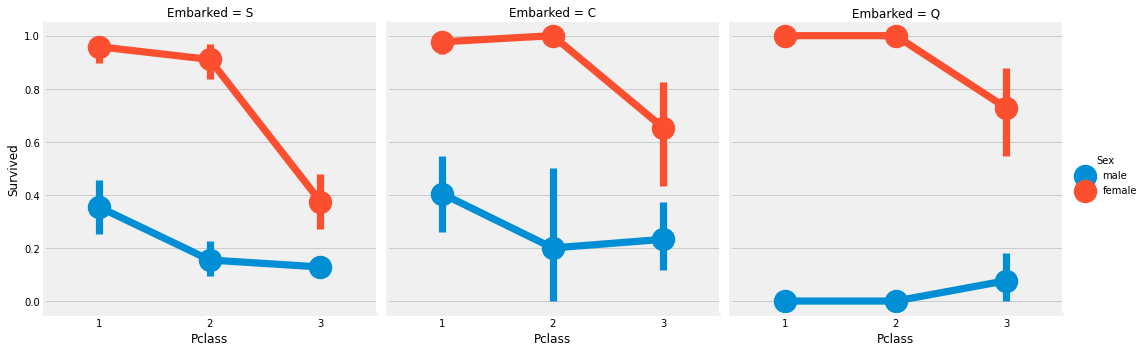

In [32]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

**논평:**  
1) 생존 확률은 거의 1입니다. Pclass1 과 Pclass2의 여자들의 경우. Embarked에 상관 없이.  
2) S항구의 Pclass3 승객은 운이 매우 좋지 않은 듯 합니다. 여자와 남자의 생존률이 매우 낮았기 때문입니다.  
3) Q 항구의 남자들은 매우 운이 안좋아 보입니다. 이들 중 대부분은 Pclass3입니다.

**Filling Embarked NaN**  
가장 많은 승객이 S 항구에서 탑승했기 때문에 S의 값으로 NaN 값을 대체하겠습니다.

In [33]:
data['Embarked'].head(5)

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [34]:
data['Embarked'].fillna('S', inplace=True)

In [35]:
data.Embarked.isnull().any()

False

Embarked 컬럼의 null 값이 모두 대체됐습니다.

### SibSp -> Discrete Feature
해당 피처는 어떤 사람이 혼자인지, 가족과 있는지를 나타냅니다.  
Sibling = 형제, 자매, 새형재, 새자매  
Spouse = 남편, 아내

In [36]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


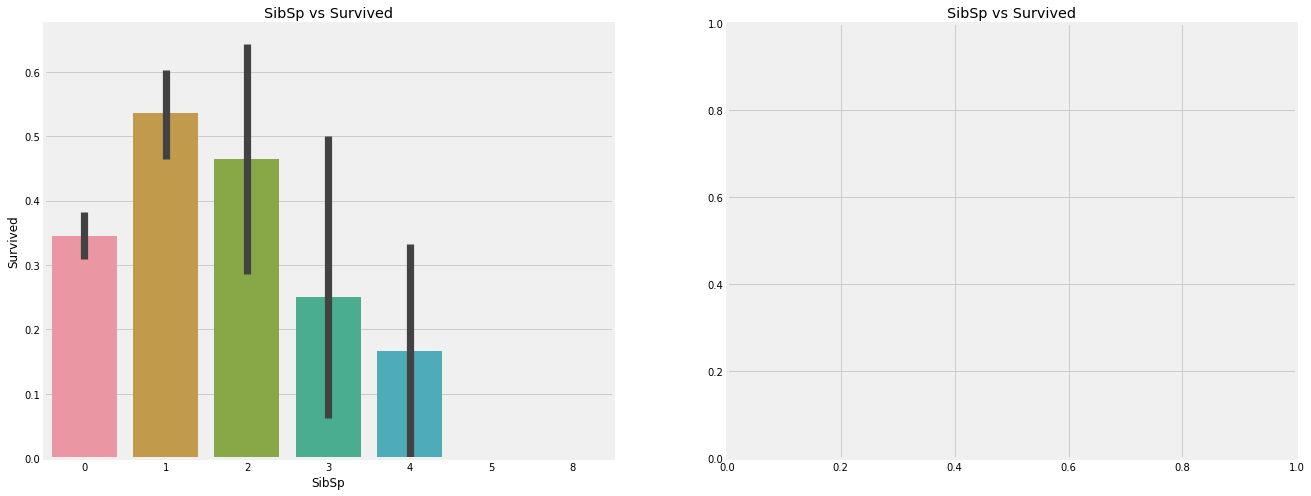

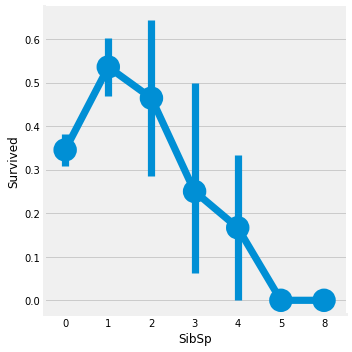

In [37]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
# plt.close(2)
plt.show()

In [38]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


**논평:**  
barplot과 factorplot은 나타냅니다. 만약 승객이 혼자 탑승했다면 형제자매 없이 그는 34.5%로 생존할 것입니다. 그래프는 심하게 감소합니다. 형제자매의 수가 증가할 수록. 이는 말이 됩니다. 만약 내가 가족과 같이 탑승했다면 내가 먼저 사는 대신에 그들을 살리려고 노력했을 것입니다. 놀랍게도 5-8의 가족이 있는 경우 생존률은 0%입니다.  
이유는 Pclass 때문입니다. crosstab의 SibSp>3은 모두 Pclass3 이었습니다. Pclass의 모든 대가족(>3)이 사망할 것은 임박한 일이었습니다.

### Parch

In [39]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


크로스탭은 다시금 보여줍니다. 대가족은 Pclass3에서 탑승했다는 것을

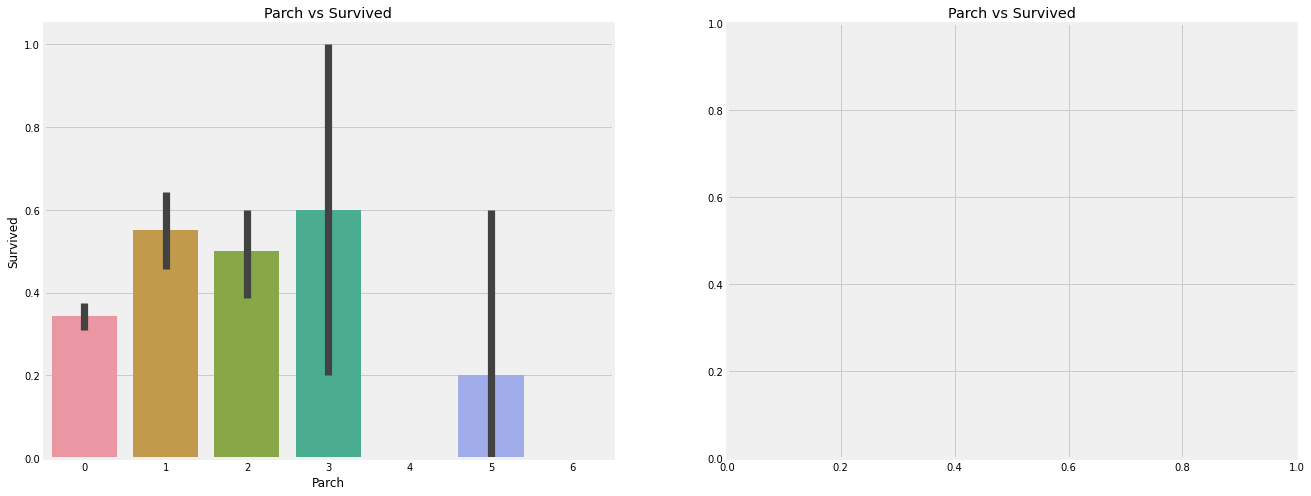

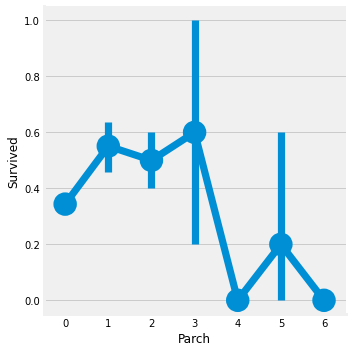

In [40]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.show()

**논평:**  
비슷한 결과가 나왔습니다. 부모님과 같이 탑승한 사람은 더욱 많은 생존률을 가집니다. 하지만 이는 구성원 수가 올라감에 따라 감소합니다.  
생존률은 1-3 명의 부모님을 가진 사람이 좋습니다. 혼자라는 것은 치명적이라는 것이 드러났으며 4명 이상의 부모가 배에 있는 사람은 생존률이 감소합니다.

### Fare -> Continous Feature

In [41]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


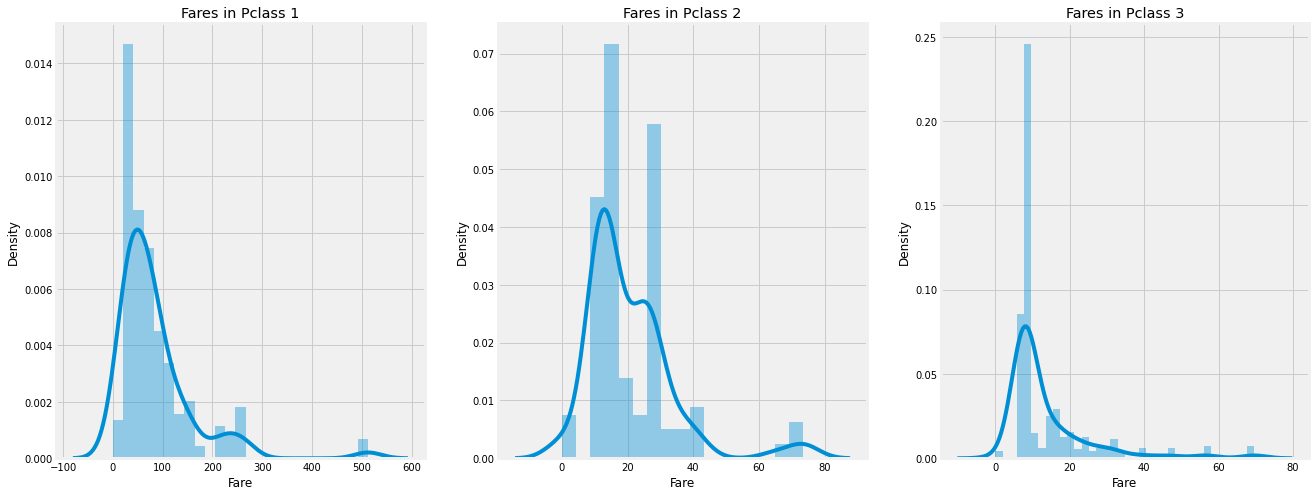

In [42]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

Pclass1에는 매우 큰 요금 분포가 있는 것 같습니다. 그리고 이는 표준이 감소함에 따라 감소합니다?  
이 또한 continous하기 때문에 binning을 이용해 이산값으로 전환할 수 있습니다.

### 모든 피처에 대한 중간 점검:  
**Sex:** 남성과 비교했을 때 여성의 생존률이 더 높았다.  
**Pclass:** 눈에 띄는 경향이 있습니다. 1st class의 승객은 생존률이 높았습니다. Pclass 3의 경우 생존률이 매우 낮았습니다. 여성의 경우 Pclass1의 생존률은 거의 1이었으며 Pclass2 또한 마찬가지로 높았습니다.  
**Age:** 5-10살 정도의 아이들은 생존률이 높았습니다. 15-35살 정도 되는 나이대의 승객들이 매우 많이 사망했습니다.  
**Embarked:** 매우 흥미로운 피처입니다. **C 항구의 생존 확률이 더욱 나은 것 같습니다. 대다수의 Pclass1 승객이 S에서 탔음에도.** Q 항구의 승객은 대부분 Pclass3 이었습니다.  
**Parch + SibSp:** 1-2명의 배우자나 형제자매, 혹은 1-3명의 부모님과 같이 탑승했다면 비교적 좋은 생존 확률을 갖습니다. 하지만 혼자라거나 대가족이라면 이보다 못합니다.

### Correlation Between The Features

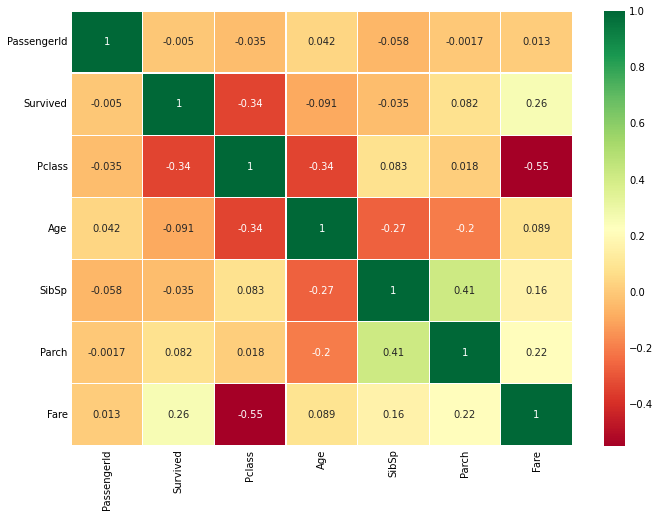

In [43]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2) # data.corr() -> correlation matrix
fig=plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

**Heatmap에 대한 해석**  
첫 번째로 알아두어야 할 사실은 오직 숫자로 된 피처들만 비교된다는 것입니다. 우리는 상관관계를 비교할 수 없습니다. 알파벳과 숫자들 간에는. plot을 이해하기 전에 상관관계가 무엇인지 먼저 알아야 합니다.  
  
**양의 상관관계:** feature A의 증가가 feature B의 증가를 이끌어 낸다면 이들은 양의 상관관계를 가지고 있습니다. A가 1을 가지고 있다면 완벽한 양의 상관관계임을 의미합니다.  
  
**음의 상관관계:** feature B의 감소가 feature B의 감소를 이끌어 낸다면 이들은 음의 상관관계를 가지고 있습니다. A가 -1을 가지고 있다면 완벽한 음의 상관관계임을 의미합니다.

두 피처가 매우 높이, 혹은 완벽한 상관관계를 가지고 있다고 할 때 하나의 증가는 다른 하나의 증가를 가져옵니다. 이는 두 피처가 매우 비슷한 정보를 가지고 있음을 의미하며 정보에 있어 분산이 매우 적거나 없다는 것입니다. 이는 **다중공선성(MultiColinearity)**으로 알려져 있으며, 앞의 두 피처는 거의 같은 정보를 가지고 있습니다.  
  
두 정보가 중복되는 상황에서 두 가지를 다 사용해야 한다고 생각하나요? 모델을 만들거나 훈련시킬 때에는 중복되는 것들을 제거해야 훈련 시간을 감소시킬 수 있는 등 많은 이점이 있습니다.  
  
이제 위의 히트맵에서 피처들 간에 상관관계가 많지 않다는 것을 발견할 수 있습니다. **가장 높은 상관관계는 SibSp, Parch에서 0.41입니다.** 따라서 우리는 모든 피처를 사용할 수 있습니다.

## Part2: Feature Engineering and Data Cleaning
Feature가 포함된 데이터 셋을 받았다고 했을 때 모든 피처가 중요할 필요는 없습니다. 아마 중복되는 피처들이 있을텐데 이들은 제거돼야 합니다. 또한 새로운 피처를 추가할 수도 있습니다. 서로 다른 피처로부터 정보를 관찰하거나 추출해서  
  
예를 들자면 Name Feature를 사용해 Initials 피처를 만드는 것입니다. 새로운 피처를 만들거나 제거해야될 지 살펴보도록 하겠습니다. 또한 연관된 피처들을 변화시켜서 Predictive Modeling에 적합하게 만들겠습니다.

### Age_band

**Age 피처의 문제점:**  
앞서 언급 했듯이 Age는 연속 피처입니다. 머신러닝 모델에 있어서 연속 변수는 문제가 있습니다.  
  
만약 스포츠인에 대해서 성별을 기준으로 그룹이나 배열을 한다고 할 때 쉽게 남성이나 여성에 따라 쉽게 분리할 수 있습니다.  
  
하지만 나이를 기준으로 그룹을 한다고 하면 어떻게 하겠습니까? 30명이 있다고 할 때 30개의 변수가 있을 것입니다. 바로 이 것이 문제가 되는 것입니다.  
  
따라서 우리는 이러한 연속 변수를 범주형 값으로 변환해야 합니다. Binning이나 Normalization을 통해서. 여기서는 binning을 쓸 것입니다. 즉 나이의 범위나 그룹을 하나의 bin이나 하나의 값으로 만들어 주는 것입니다.  

승객의 최대 나이는 80살입니다. 따라서 0-80을 5개의 범위로 나눌 것입니다. 80/5=16이니 16이 bins 사이즈가 될 것입니다. 

In [44]:
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    22.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [45]:
data['Age_band'] = 0 # 컬럼 생성
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [46]:
data['Age_band'].value_counts()

1    382
2    325
0    104
3     69
4     11
Name: Age_band, dtype: int64

In [47]:
# 각 나이 밴드의 승객 수 확인
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


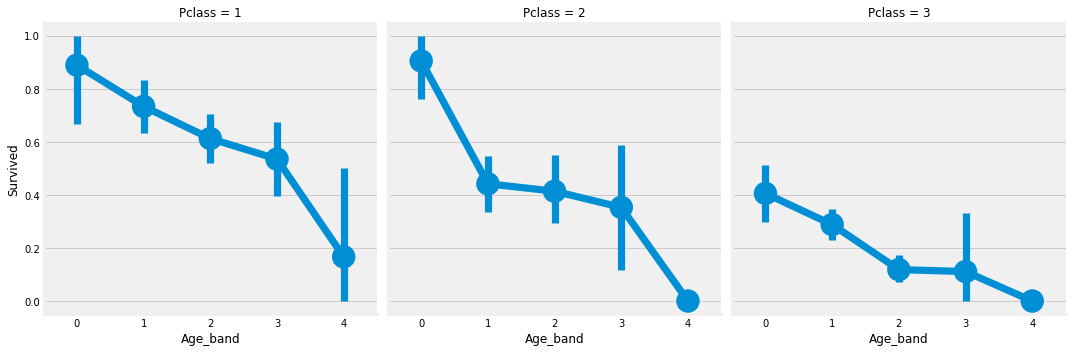

In [48]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

생존률은 나이가 증가할 수록 감소합니다. Pclass에 상관 없이

### Family_Sizde and Alone
이 섹션에서는 "Family_size", 그리고 "Alone"이라는 새로운 피처를 만들고 분석할 수 있습니다. 이 피처는 Parch와 SibSp의 요약입니다. 이는 결합된 데이터를 제공해 주며 이로써 우리는 생존률이 승객의 가족 사이즈에 연관 되었는지 확인할 수 있습니다. Alone은 승객이 혼자인지 아닌지를 나타낼 것입니다.

In [49]:
data['Family_Size'] = 0 # Family_size 생성
data['Family_Size'] = data['Parch'] + data['SibSp'] # family size

data['Alone'] = 0 #Alone 생성
data.loc[data.Family_Size == 0, 'Alone'] = 1 # 가족 수가 0명이면 혼자라는 뜻

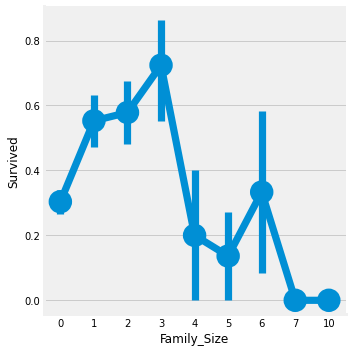

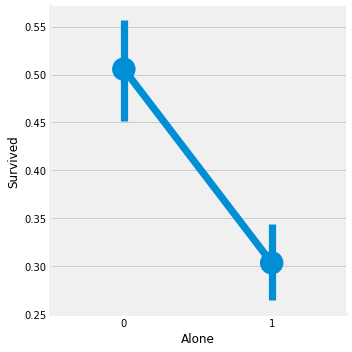

In [50]:
f, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.close(1)
# plt.close(3)

plt.show()

Family_Size = 0 이라는 것은 승객이 혼자임을 의미합니다. 확실히 혼자이거나 Family_Size = 0이라면 생존률은 매우 낮습니다. family size > 4의 경우 기회가 낮아지는 것은 마찬가지입니다. 이 또한 모델에 있어 중요한 피처인듯 합니다. 더 조사해 보도록 합시다.

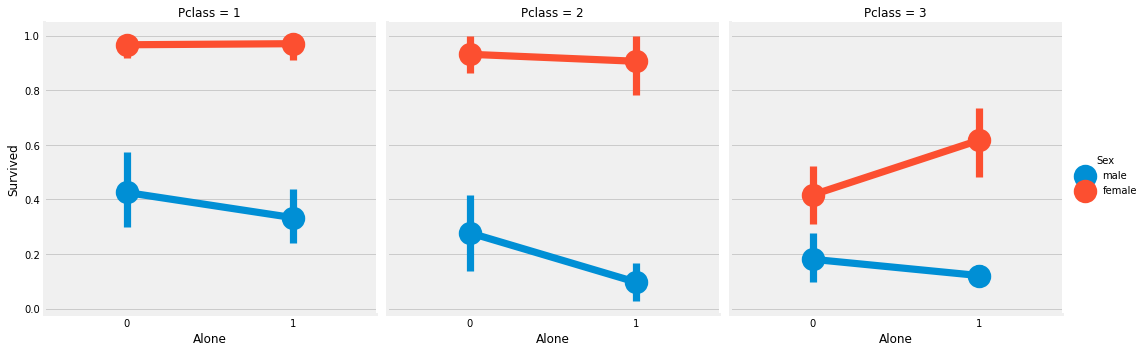

In [51]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

Pclass3을 빼고는 혼자가 되는 것이 Sex나 Pclass에 관계없이 해롭습니다. Pclass3에서는 가족보다 혼자 있는 사람이 더욱 높은 기회를 얻습니다.

### Fare_Range
요금 또한 연속 피처이기 때문에 순위 변수로 바꿀 필요가 있습니다. 이를 위해서 pandas.qcut을 사용할 것입니다.  
  
qcut의 역할은 값을 쪼개거나 정렬하는 것입니다. 우리가 거쳐온 bin에 따라서. 만약 5개의 bins가 통과됐다면 qcut은 값을 균등한 공간으로 나누어 5개의 bins나 값 범위로 배열할 것입니다.

In [52]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


위에서 다루었듯이 우리는 확실히 볼 수 있습니다. fare_range가 증가함에 따라서 생존률 또한 증가합니다.  
  
하지만 Fare_Range 변수를 그대로 통과시킬 수는 없습니다. 우리는 이를 단독 개체로 만들어야 합니다. Age_band에서 했던 것 과 같이.

In [53]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] < 513), 'Fare_cat'] = 3

In [54]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1,"(7.91, 14.454]",1


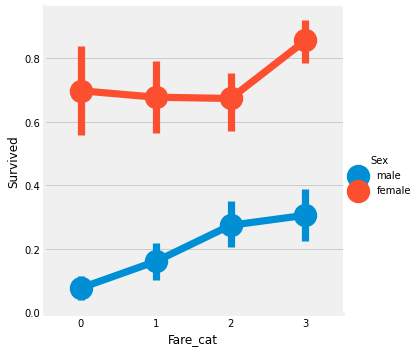

In [55]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

확실히 Fare_cat이 증가하면서 생존률 또한 증가합니다. 이 피처는 아마 Sex를 모델링 하면서 중요한 피처가 될 것입니다.

In [56]:
# srt 타입의 문자들 정수로 치환
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace=True)

**불필요한 피처 제거**  
**Name** -> 이름 피처는 필요 없습니다. 이는 다른 범주형 변수로 변환할 수 없기 때문입니다.  
**Age** -> Age_band라는 피처가 있으니 이 또한 필요 없습니다.  
**Ticket** -> 이는 범주화할 수 없는 무작위 숫자일 뿐입니다.  
**Fare** -> Face_cat 피처가 있으니 필요 없습니다.  
**Cabin** -> 매우 많은 NaN 변수가 있으며 많은 승객이 몇 개의 cabins를 가지고 있습니다. 따라서 이는 쓸모 없는 피처입니다.  
**Fare_Range** -> fare_cat이 있습니다.  
**PassengerId** -> 범주화할 수 없습니다.

In [57]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)

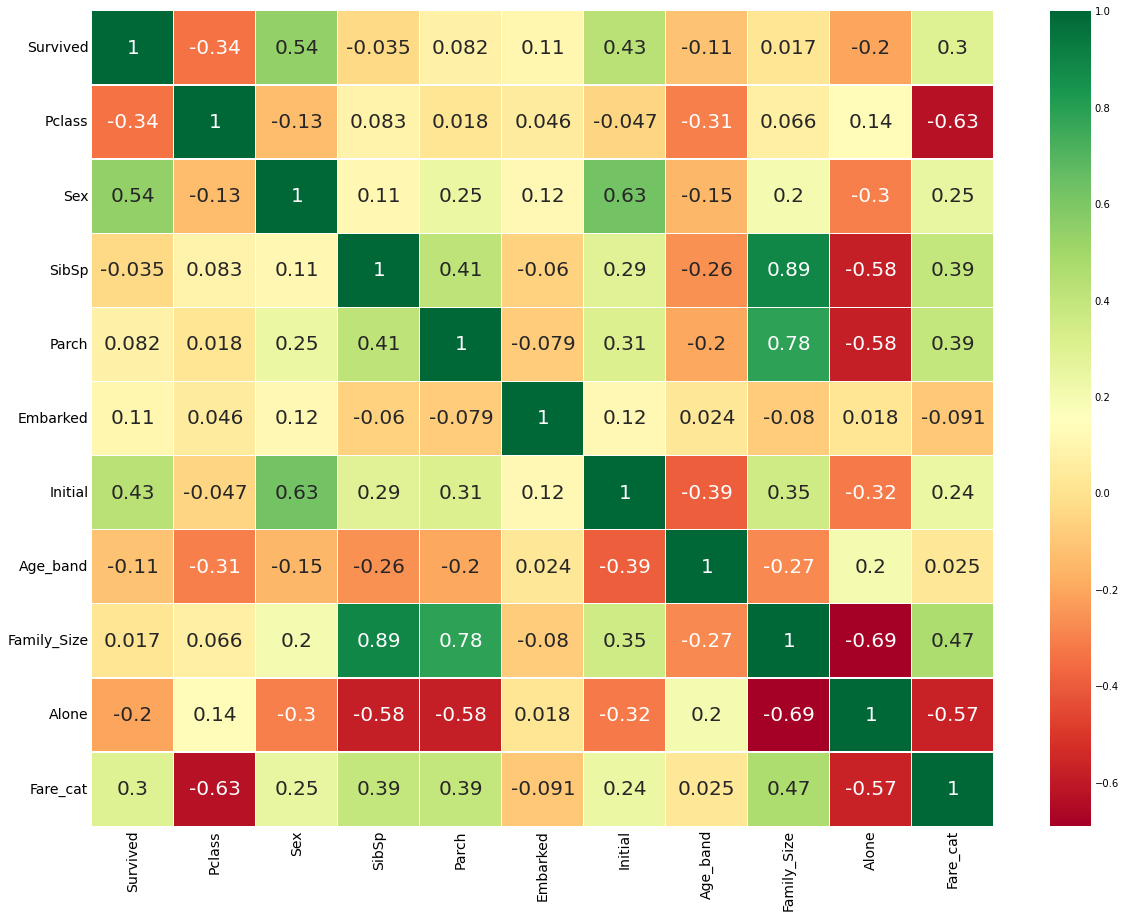

In [58]:
# annot_kws={'size':20} : annot 숫자 폰트 사이즈 조절

sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

위의 상관관계 그래프를 보면 양의 상관관계를 가진 몇 개의 피처를 볼 수 있습니다. 이들 중 몇몇은 *SIbSp와 Family_Size 그리고 Parch와 Family_Size입니다.** 음의 상관관계를 갖는 것은 **Alone과 Family_Size 같은 것입니다.**

## Part3: Predictive Modeling
우리는 EDA 파트를 통해 인사이트를 얻었습니다. 하지만 그것으로 승객이 생존하거나 사망하는지 정확하게 예측하거나 말할 수 없습니다. 따라서 이제 우리는 승객이 생존하거나 죽을지 예측할 것입니다. 뛰어난 몇 개의 분류 알고리즘을 사용해서. 다음은 우리가 사용할 알고리즘 모델입니다.

1) Logistic Regression  
  
2) Support Vector Machines(Linear and radial)  
  
3) Random Forest  
  
4) K-Nearest Neighbours  
  
5) Naive Bayes  
  
6) Decision Tree

In [59]:
# importing all the required ML packages

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [60]:
train, test = train_test_split(data, test_size = 0.3, random_state=0, stratify = data['Survived'])

In [61]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
231,0,3,0,0,0,0,0,1,0,1,0
836,0,3,0,0,0,0,0,1,0,1,1
639,0,3,0,1,0,0,0,2,1,0,2
389,1,2,1,0,0,1,2,1,0,1,1
597,0,3,0,0,0,0,0,3,0,1,0


In [62]:
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]

test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]

X = data[data.columns[1:]]
Y = data['Survived']

**Radial Support Vector Machines(rbf-SVM)**

In [63]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.835820895522388


**Linear Support Vector Machine(linear-SVM)**

In [64]:
model = svm.SVC(kernel = 'linear', C = 0.1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is ', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is  0.8171641791044776


**Logistic Regression**

In [65]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Refression is ', metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logistic Refression is  0.8134328358208955


**Decision Tree**

In [66]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is ', metrics.accuracy_score(prediction4, test_Y))

The accuracy of the Decision Tree is  0.8022388059701493


**K-Nearest Neighbours(KNN)**

In [67]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is ', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is  0.8134328358208955


KNN 모델의 정확도는 우리가 **n_neighbours** 어트리뷰트 값을 변화함에 따라 달라집니다. 디폴트 값은 5입니다. n_neighbours의 다양한 값에 대한 정확도를 확인해 봅시다.

In [68]:
a_index = list(range(1, 11))
a = pd.Series()
a

Series([], dtype: float64)

In [69]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in list(range(1, 11)):
  model = KNeighborsClassifier(n_neighbors = i)
  model.fit(train_X, train_Y)
  prediction = model.predict(test_X)
  a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))

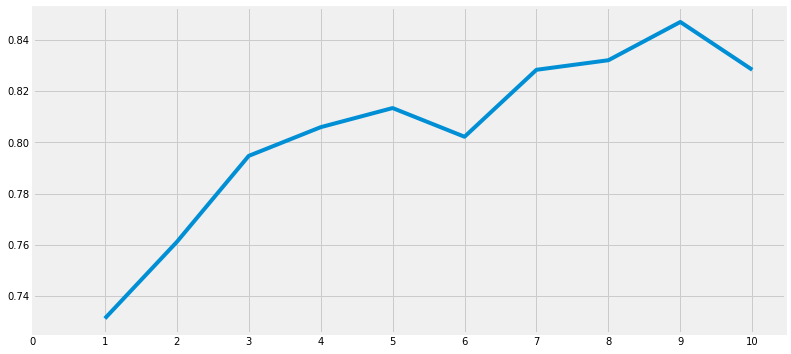

Accuracies for different values of n are:  [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84701493 0.82835821] 

 with the max value as  0.8470149253731343


In [70]:
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

print('Accuracies for different values of n are: ', a.values, '\n\n', 'with the max value as ', a.values.max())

**Gaussian Naive Bayes**

In [71]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is ', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaiveBayes is  0.8134328358208955


**Random Forest**

In [72]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forest is ', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forest is  0.8246268656716418


모델의 정확도는 하나의 요인만 있지 않습니다. 요인은 결정합니다. 분류기의 강건함을. 분류기가 트레이닝 데이터로 훈련되고 테스트 데이터를 테스트 한 결과 정확도가 90%가 나왔다고 해봅시다.  
  
이것은 매우 좋은 정확도를 가진 분류기로 보입니다. 하지만 새로운 테스트 셋에 대해서 모두 90% 이상이라고 동의할 수 있습니까? 대답은 아니오 입니다. 왜냐하면 우리는 분류기가 스스로를 훈련시키는데 사용할 모든 인스턴스를 결정할 수 없습니다. training, testing 데이터가 바뀔 때 마다 accuracy 또한 변합니다. 이는 아마 증가하거나 감소할 것입니다. 이런 현상은 **model variance**라고 알려져 있습니다.  
  
이를 극복하고 모델을 일반화 하기 위해서 **Cross Validation**을 사용합니다.

### Cross Validation
많은 경우, 데이터는 불균형합니다. 즉 class 1 인스턴스는 많으며 다른 class는 이보다 적을 수 있습니다. 그러므로 우리는 알고리즘을 train, test 해야합니다. 데이터의 각 인스턴스에서. 데이터셋 전반에 대해 모든 정확도가 기록된 평균을 얻을 수 있습니다.  
  
1) K-Fold Cross Validation은 먼저 데이터셋을 k개의 하위 집합으로 나눔으로써 작동합니다.  
  
2) k-5로 데이터셋을 나눈다고 했을 때 하나의 파트는 test 용도로 저장하고 나머지 4 파트는 알고리즘을 train 하는 용도로 저장합니다.  
  
3) 이후 testing part를 바꾸면서 절차가 진행됩니다.그리고 알고리즘을 training합니다 다른 나머지 파트에. 그럼 accuracies와 errors가 평균이 됩니다. 알고리즘의 평균 정확도를 얻음으로써  
  
이는 K-Fold Cross Validation이라고 불립니다.  
  
4) 알고리즘은 train 데이터 셋에 대해서 overfit되거나 underfit될 수 있습니다. 따라서 cross-validation을 사용하면 일반화된 모델을 얻을 수 있습니다.

In [73]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

kfold = KFold(n_splits = 10, random_state = 22, shuffle=True)

xyz = []
accuracy = []
std = []

classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Refression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]

In [74]:
for i in models:
  model = i
  cv_result = cross_val_score(model, X, Y, cv = kfold, scoring="accuracy")
  cv_result = cv_result
  xyz.append(cv_result.mean())
  std.append(cv_result.std())
  accuracy.append(cv_result)

new_models_dataframe2 = pd.DataFrame({'CV Mean': xyz, 'Std' :std}, index = classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Refression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.809226,0.044264
Naive Bayes,0.795843,0.054861
Random Forest,0.809251,0.041767


In [75]:
box = pd.DataFrame(accuracy, index = [classifiers])
box

,0,1,2,3,4,5,6,7,8,9
Linear Svm,0.700000,0.764045,0.752809,0.820225,0.730337,0.764045,0.876404,0.752809,0.797753,0.887640
Radial Svm,0.744444,0.775281,0.808989,0.853933,0.775281,0.797753,0.921348,0.831461,0.853933,0.921348
Logistic Refression,0.733333,0.775281,0.808989,0.797753,0.752809,0.775281,0.853933,0.797753,0.831461,0.865169
KNN,0.755556,0.797753,0.775281,0.808989,0.786517,0.797753,0.865169,0.820225,0.797753,0.876404
Decision Tree,0.788889,0.842697,0.741573,0.808989,0.808989,0.775281,0.842697,0.786517,0.786517,0.910112
Naive Bayes,0.700000,0.786517,0.752809,0.786517,0.764045,0.752809,0.865169,0.820225,0.842697,0.887640
Random Forest,0.766667,0.831461,0.752809,0.775281,0.786517,0.808989,0.865169,0.831461,0.786517,0.887640


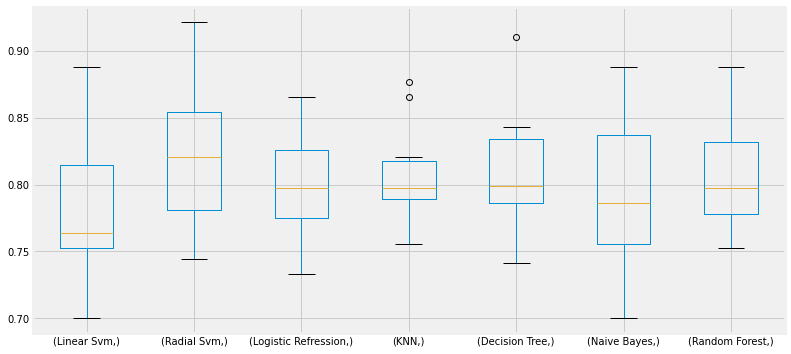

In [76]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

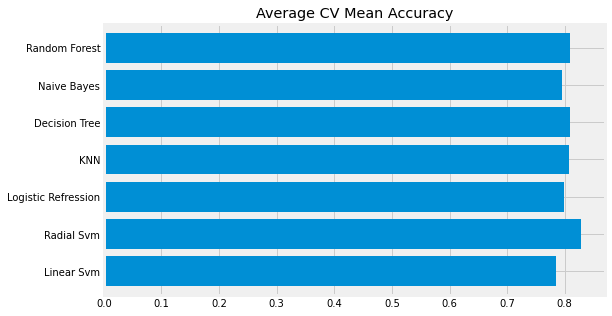

In [77]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

분류의 정확도는 가끔씩 임발란스로 인해서 잘못될 수 있습니다. 우리는 confusion matrix의 요약된 결과로 도움을 얻을 수 있습니다. confusion maxrix는 어디서 모델이 잘못됐는지, 혹은 어떤 class가 모델 예측을 잘못 했는지 보여줍니다.

### Confusion Matrix
이것은 분류기에 의해 만들어진 분류의 정확한, 혹은 부정확한 수를 보여줍니다.

In [78]:
X

,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,0,1,1,2,1,0,3
2,3,1,0,0,0,2,1,0,1,1
3,1,1,1,0,0,1,2,1,0,3
4,3,0,0,0,0,0,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,0,0,4,1,0,1,1
887,1,1,0,0,0,2,1,0,1,2
888,3,1,1,2,0,2,1,3,0,2
889,1,0,0,0,1,0,1,0,1,2


In [79]:
# X = data[data.columns[1:]]
# Y = data['Survived']

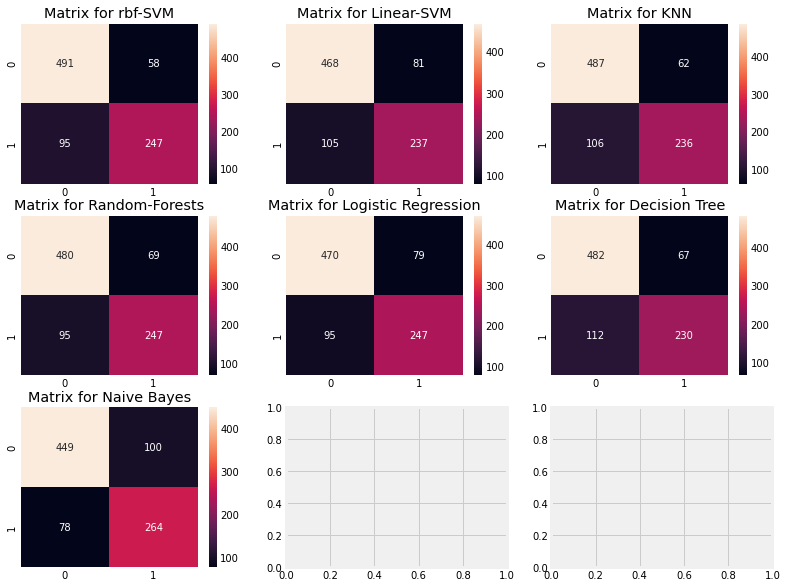

In [80]:
f, ax = plt.subplots(3, 3, figsize = (12, 10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[0, 0], annot = True, fmt = '2.0f')
ax[0, 0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[0, 1], annot = True, fmt = '2.0f')
ax[0, 1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[0, 2], annot = True, fmt = '2.0f')
ax[0, 2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[1, 0], annot = True, fmt = '2.0f')
ax[1, 0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[1, 1], annot = True, fmt = '2.0f')
ax[1, 1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[1, 2], annot = True, fmt = '2.0f')
ax[1, 2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[2, 0], annot = True, fmt = '2.0f')
ax[2, 0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

**Confusion Matrix 해석**  
왼쪽 대각선은 각 클래스에 대해서 맞은 예측의 수를 보여줍니다. 반면 오른쪽 대각선은 틀린 예측의 수를 보여줍니다. rbf-SVM의 첫 번째 그래프를 살펴봅시다.  
  
1) 맞은 예측의 개수는 **491(for dead) + 247(for survived)** 평균 vs accuracy는 **(491 + 247)/891 = 82.8%**가 될 것입니다. 이것은 우리가 위에서 얻었던 것입니다.  
  
2) Errors -> 58명의 사망자를 생존자로 잘못 분류했으며 95명의 생존자를 사망자로 분류했습니다. 그러므로 이는 더 많은 실수를 했습니다. 사망자를 생존자로 예측함으로써  
  
이 모든 매트릭스를 살펴 봄으로써 rvf-SVM이 사망자를 옳게 예측할 수 있는 더 많은 기회를 가진다고 할 수 있습니다. 하지만 나이브 베이즈는 생존한 승객을 옳게 예측할 수 있는 더 많은 기회가 있습니다.

**하이퍼 파라미터 튜닝**  
머신러닝 모델은 블랙박스와 같습니다. 이러한 블랙박스에는 디폴트 파라미터 값이 있는데, 이것을 우리는 튜닝하거나 바꿔서 더 좋은 모델로 만들 수 있습니다. SVM에서 C나 gamma 그리고 비슷하게 다른 classifier는 다른 파라미터가 있습니다. 이들은 hyper-parameters라고 불립니다. 우리는 이것을 조정해서 알고리즘의 leaning-rate를 바꿀 수 있습니다. 이것이 하이퍼 파라미터 튜닝이라고 불립니다.  
  
우리는 2개의 best classifiers에 대해 하이퍼 파라미터 튜닝을 할 것입니다. 즉 SVM, RandomForests입니다.

**SVM**

In [81]:
from sklearn.model_selection import GridSearchCV

C = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel': kernel, 'C': C, 'gamma': gamma}

gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 220 candidates, totalling 1100 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


**Random Forests**

In [82]:
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators' : n_estimators}
gd = GridSearchCV(estimator = RandomForestClassifier(random_state = 0), param_grid = hyper, verbose = True)
gd.fit(X, Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


Rbf-Svm에서 베스트 스코어는 **82.82%, 이 때 C=0.4, gamma=0.3**입니다.  
RandomForest에서 베스트 스코어는 **81.9%, 이때 n_estimators=300**입니다.

### Ensembling

앙상블은 모델의 정확도와 성능을 향상시키는 좋은 방법입니다. 간단히 말해 이는 간단하고 다양한 모델을 조합하여 하나의 강력한 모델을 만드는 것입니다.  
  
우리가 폰을 사고 싶어서 다양한 파라미터를 기반으로 여러 사람에게 물어봤습니다. 그러면 우리는 서로 다른 모든 파라미터를 분석해 하나의 제품에 대해 강력한 판단을 내릴 수 있게 됩니다. 이것이 앙상블이며 모델의 안정성을 증가시킵니다. 앙상블은 다음과 같은 방식으로 수행됩니다.  
  
1) Voting Classifier  
  
2) Bagging  
  
3) Boosting

### Voting Classifier
보팅은 예측을 조합하는 가장 간단한 방법입니다. 간단하고 많은 다른 머신 러닝 모델로부터. 이는 평균 예측 결과를 가져옵니다. 하위 모델의 예측을 기반으로. 하위 모델 또는 기본 모델은 모두 다른 타입입니다.

In [83]:
from sklearn.ensemble import VotingClassifier

ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8249188514357053


### Bagging
배깅은 일반적인 앙상블 방식입니다. 이는 비슷한 분류기를 데이터셋의 작은 부분에 적용한 다음 모든 예측에 대해서 평균을 취합니다. 평균을 냄으로써 분산이 줄어듭니다. 보팅 분류기와 달리 배깅은 유사한 분류기를 사용합니다.

**Bagged KNN**  
배깅은 높은 분산을 가진 모델에서 높은 효과를 보입니다. 예를 들어 의사결정나무나 랜덤포레스트가 있습니다. 우리는KNN을 n_neighbours의 작은 값으로 사용할 수 있습니다.

In [86]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is:', result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


**Bagged DecisionTree**

In [87]:
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Dicision Tree is:', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:', result.mean())

The accuracy for bagged Dicision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


### Bosting
부스팅은 앙상블 테크닉인데 이는 분류기의 순차적인 학습을 이용합니다. 부스팅은 약한 분류기를 순차적으로 강화하며 다음의 절차를 따릅니다.  
모델은 초기 전체 데이터셋을 학습합니다. 모델이 약간의 맞는 인스턴스를 얻는 반면 몇은 틀릴 것입니다. 다음 반복에서는 학습기가 잘못 예측된 인스턴스에 더욱 집중하거나 이에 대해서 더 가중치를 두게 됩니다. 이렇게 함으로써 틀린 인스턴스를 올바르게 예측하려 합니다. 이러한 반복적인 과정이 계속 되며 새로운 분류기가 모델의 정확도 한계에 도달할 때 까지 계속됩니다.

**AdaBoost(Adaptive Boosting)**  
이 경우 약한 학습기나 예측기는 의사결정나무입니다. 하지만 우리는 default base_estimator를 우리가 선택한 모든 알고리즘으로 변경할 수 있습니다.

In [92]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is:', result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


**Stochastic Gradient Boosting**  
이 또한 약한 학습기는 의사결정나무입니다.

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is:', result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


**XGBoost**

In [94]:
import xgboost as xg

xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is:', result.mean())

The cross validated score for XGBoost is: 0.8115480649188515


AdaBoost로 가장 높은 정확도를 얻었습니다. 하이퍼 파라미터 튜닝을 통해 이 것을 증가시키도록 시도하겠습니다.

**Hyper-Parameter Tuning for AdaBoost**

In [96]:
n_estimators = list(range(100, 1100, 100))
learn_rate = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {'n_estimators': n_estimators, 'learning_rate': learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 110 candidates, totalling 550 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


AdaBoost로 얻을 수 있는 최대 accuracy는 82.9%이머 이 때 n_estimators=100, learning_rate=0.1입니다.

**Confusion Matrix for the Best Model**

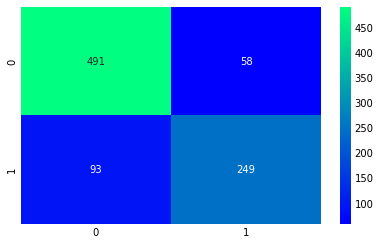

In [98]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=0.1)
result = cross_val_predict(ada, X, Y, cv=10)

sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

### Feature Importance

In [103]:
model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns)

Pclass         0.136387
Sex            0.188327
SibSp          0.048730
Parch          0.032727
Embarked       0.056410
Initial        0.254149
Age_band       0.090890
Family_Size    0.076785
Alone          0.011538
Fare_cat       0.104057
dtype: float64

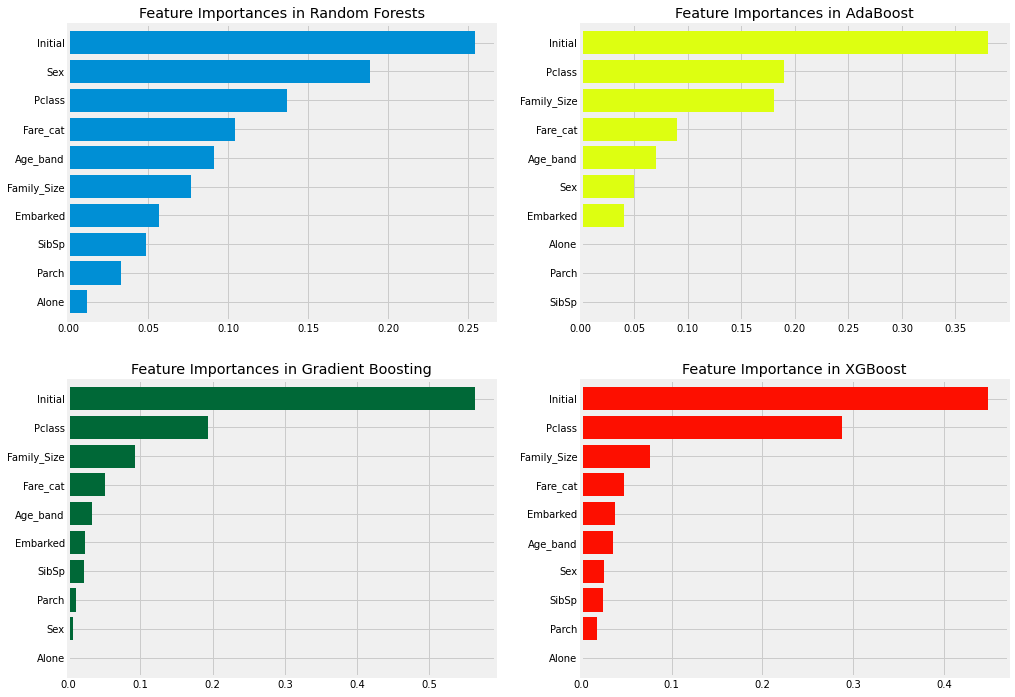

In [109]:
f, ax = plt.subplots(2, 2, figsize=(15, 12))
model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 0])
ax[0, 0].set_title('Feature Importances in Random Forests')

model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 1], color='#ddff11')
ax[0, 1].set_title('Feature Importances in AdaBoost')

model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 0], cmap='RdYlGn_r')
ax[1, 0].set_title('Feature Importances in Gradient Boosting')

model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 1], color='#FD0F00')
ax[1, 1].set_title('Feature Importance in XGBoost')

plt.show()

랜덤포레스트, 에이다 부스트 등의 다양한 분류기에서 피처 중요도를 확인할 수 있습니다.

**논평:**  
1) 흔히 중요한 피처들 중 몇 개는 Initial, Fare_cat, Pclass, Family_Size 입니다.  
  
2) Sex feature은 중요도가 부여되지 않는 것 같습니다. 이는 꽤 놀라운데, 위에서 Sex는 Pclass와 연관되어 매우 구별되는 요소였습니다. Sex는 랜덤포레스트에서만 중요하게 여겨지는 듯 합니다.  
  
반면 Initial의 경우 많은 분류기에서 1위를 기록했습니다. Sex와 Initial에는 양의 상관관계가 있는 것을 확인 했듯이 이들은 둘 다 성별을 내포하고 있습니다.  
  
3) 마찬가지로 Pclass와 Fare_cat은 승객의 상황, 즉 Family_Size에서 Alone, Parch 그리고 SibSp을 의미합니다.